<a href="https://colab.research.google.com/github/hozhao87/Data_Visualization_Project/blob/main/scRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#A single-cell analysis of breast cancer cell lines to study tumour heterogeneity and drug response
#https://www.nature.com/articles/s41467-022-29358-6
# MTX data files taken from https://figshare.com/articles/dataset/Single_Cell_Breast_Cancer_cell-line_Atlas/15022698

# Install/import modules

In [3]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=6a5865e4cfe4fee3adc8030890fe3cbd3ab236240203bae6e63a80248c304c21
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [104]:

import scanpy as sc
import anndata
import scipy.io
import time
t0start = time.time()

import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import seaborn as sns

In [5]:
from google.colab import drive

In [107]:
# Step 1: Load the Matrix Market file into a sparse matrix
matrix = sc.read_10x_mtx('matrix.mtx')  # Path to your matrix.mtx file

# Step 2: Load the cell and gene metadata (if available)
# You may need to load cell names and gene names if they are in separate files
cells = pd.read_csv('cells.tsv', header=None)  # or use appropriate file format
genes = pd.read_csv('genes.tsv', header=None)  # or use appropriate file format

# Step 3: Create an AnnData object
adata = sc.AnnData(matrix)
adata.obs_names = cells[0].values  # Assign cell names
adata.var_names = genes[0].values  # Assign gene names

# Now adata contains the matrix.mtx data with metadata

FileNotFoundError: Did not find file matrix.mtx/matrix.mtx.gz.

UsageError: Cell magic `%%MatrixMarket` not found.


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.getcwd()
os.listdir()

['.config', 'drive', 'sample_data']

In [8]:
import os
os.getcwd()
os.listdir('/content/drive/MyDrive/Colab Notebooks')

['GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad',
 'Untitled0.ipynb',
 'scRNA_seq.ipynb']

# Data Visualization

In [6]:
import scanpy as sc

In [9]:
data_path = '/content/drive/MyDrive/Colab Notebooks/'
adata = sc.read_h5ad(data_path+"GSE173634_Human_BreastCancer_32CellLines_Y2021_35276Cells_Figshare_Counts_Gambardella_diBernardo.h5ad")


/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata.obs["Cell Type"].unique()

['AU565', 'HCC1937', 'HCC38', 'MDAMB468', 'EFM19', ..., 'HCC1954', 'KPL1', 'ZR751', 'MX1', 'MDAMB453']
Length: 32
Categories (32, object): ['AU565', 'BT20', 'BT474', 'BT483', ..., 'MDAMB468', 'MX1', 'T47D', 'ZR751']

In [9]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35276 entries, 0 to 35275
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FullCode   35276 non-null  object  
 1   Cell Type  35276 non-null  category
dtypes: category(1), object(1)
memory usage: 1.6+ MB


In [10]:
adata.var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47096 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         47096 non-null  object  
 1   Entrezgene      20483 non-null  category
 2   Type of gene    20483 non-null  category
 3   Map location    20472 non-null  category
 4   chr             45772 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15924 non-null  float64 
 9   Count Pathways  46982 non-null  float64 
 10  Name            34532 non-null  category
 11  Other names     18707 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 6.7+ MB


In [11]:
display(adata.var.info(), adata.var.head(), adata.var.describe(), adata.var.describe(include="O"))

<class 'pandas.core.frame.DataFrame'>
Index: 47096 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         47096 non-null  object  
 1   Entrezgene      20483 non-null  category
 2   Type of gene    20483 non-null  category
 3   Map location    20472 non-null  category
 4   chr             45772 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15924 non-null  float64 
 9   Count Pathways  46982 non-null  float64 
 10  Name            34532 non-null  category
 11  Other names     18707 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 6.7+ MB


None

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
TSPAN6,ENSG00000000003,7105,protein-coding,Xq22.1,X,100627108.0,100639991.0,-1.0,5.0,0.0,tetraspanin 6,"['A15 homolog', 'putative NF-kappa-B-activatin..."
DPM1,ENSG00000000419,8813,protein-coding,20q13.13,20,50934867.0,50959140.0,-1.0,NaN,18.0,dolichyl-phosphate mannosyltransferase subunit...,"['DPM synthase complex, catalytic subunit', 'D..."
SCYL3,ENSG00000000457,57147,protein-coding,1q24.2,1,169849631.0,169894267.0,-1.0,2.0,0.0,SCY1 like pseudokinase 3,"['SCY1-like 3', 'SCY1-like protein 3', 'SCY1-l..."
C1orf112,ENSG00000000460,55732,protein-coding,1q24.2,1,169662007.0,169854080.0,1.0,4.0,0.0,chromosome 1 open reading frame 112,uncharacterized protein C1orf112
FUCA2,ENSG00000001036,2519,protein-coding,6q24.2,6,143494812.0,143511720.0,-1.0,6.0,9.0,alpha-L-fucosidase 2,"['I+/--L-fucosidase 2', 'a-L-fucosidase 2', 'a..."


,start,end,strand,Count Pubmed,Count Pathways
count,4.577200e+04,4.577200e+04,45772.000000,15924.000000,46982.000000
mean,7.550634e+07,7.554495e+07,0.008346,57.345516,3.921034
std,5.531172e+07,5.531495e+07,0.999976,223.767758,14.834585
min,1.155500e+04,1.350100e+04,-1.000000,1.000000,0.000000
25%,3.215008e+07,3.217646e+07,-1.000000,3.000000,0.000000
50%,6.311870e+07,6.314007e+07,1.000000,11.000000,0.000000
75%,1.107287e+08,1.107768e+08,1.000000,36.000000,0.000000
max,2.489366e+08,2.489370e+08,1.000000,9888.000000,462.000000


,Ensembl
count,47096
unique,47096
top,ENSG00000284685
freq,1


In [12]:
adata.var.columns

Index(['Ensembl', 'Entrezgene', 'Type of gene', 'Map location', 'chr', 'start',
       'end', 'strand', 'Count Pubmed', 'Count Pathways', 'Name',
       'Other names'],
      dtype='object')

<Axes: ylabel='Symbol'>

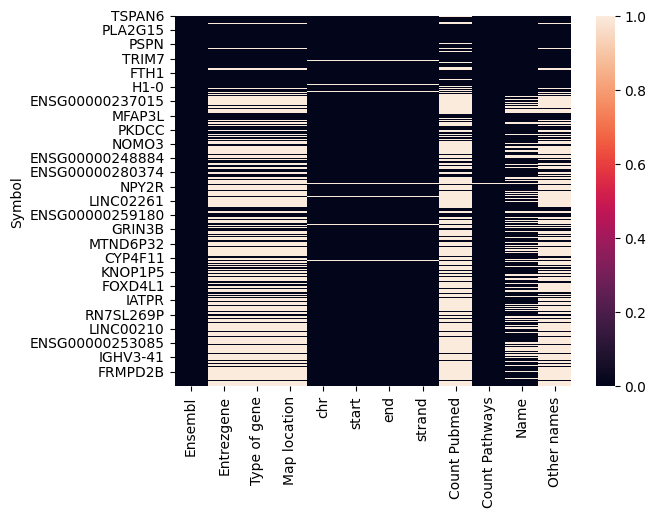

In [10]:
sns.heatmap(adata.var.isna())

In [ ]:
adata.var["Type of gene"].unique()

['protein-coding', NaN, 'pseudo', 'ncRNA', 'snoRNA', 'snRNA', 'scRNA', 'rRNA']
Categories (7, object): ['ncRNA', 'protein-coding', 'pseudo', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']

In [ ]:
adata.var["chr"].unique()
adata.var.loc[adata.var.chr.isna()]

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
IBTK,ENSG00000005700,25998,protein-coding,6q14.1,NaN,NaN,NaN,NaN,10.0,0.0,inhibitor of Bruton tyrosine kinase,"['BTK-binding protein', 'Bruton agammaglobulin..."
MAP3K14,ENSG00000006062,9020,protein-coding,17q21.31,NaN,NaN,NaN,NaN,73.0,41.0,mitogen-activated protein kinase kinase kinase 14,"['NF-kappa-beta-inducing kinase', 'mitogen-act..."
AGK,ENSG00000006530,55750,protein-coding,7q34,NaN,NaN,NaN,NaN,29.0,10.0,acylglycerol kinase,"['acylglycerol kinase, mitochondrial', 'hAGK',..."
ADIPOR2,ENSG00000006831,79602,protein-coding,12p13.33,NaN,NaN,NaN,NaN,152.0,13.0,adiponectin receptor 2,"['adiponectin receptor protein 2', 'progestin ..."
E2F2,ENSG00000007968,1870,protein-coding,1p36.12,NaN,NaN,NaN,NaN,65.0,46.0,E2F transcription factor 2,transcription factor E2F2
...,...,...,...,...,...,...,...,...,...,...,...,...
DEFA8P,ENSG00000223629,449491,pseudo,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,"defensin alpha 8, pseudogene",NaN
USP17L7,ENSG00000226430,392197,protein-coding,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,ubiquitin specific peptidase 17 like family me...,['inactive ubiquitin carboxyl-terminal hydrola...
GOLGA8Q,ENSG00000178115,727909,protein-coding,15q13.2,NaN,NaN,NaN,NaN,NaN,2.0,golgin A8 family member Q,golgin subfamily A member 8Q


In [14]:
chr_na = adata.var.loc[adata.var.chr.isna()]['Map location'].str.extract(r"(\d{1,24}|X|Y)")[0]#.unique()#.notna()#.value_counts()

In [15]:
chr_na.values

array(['6', '17', '7', ..., '15', nan, '17'], dtype=object)

In [16]:
chr_na

,0
Symbol,
IBTK,6
MAP3K14,17
AGK,7
ADIPOR2,12
E2F2,1
...,...
DEFA8P,8
USP17L7,8
GOLGA8Q,15


In [17]:
adata.var.chr.isna().sum()

1324

In [18]:
# str.extract() # ask gpt to extract what you want using regex

In [20]:
adata.var.loc[adata.var.chr.isna(), 'chr'] = chr_na.values

In [21]:
adata.var.chr.isna().sum()

116

In [22]:
adata.var

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
TSPAN6,ENSG00000000003,7105,protein-coding,Xq22.1,X,100627108.0,100639991.0,-1.0,5.0,0.0,tetraspanin 6,"['A15 homolog', 'putative NF-kappa-B-activatin..."
DPM1,ENSG00000000419,8813,protein-coding,20q13.13,20,50934867.0,50959140.0,-1.0,NaN,18.0,dolichyl-phosphate mannosyltransferase subunit...,"['DPM synthase complex, catalytic subunit', 'D..."
SCYL3,ENSG00000000457,57147,protein-coding,1q24.2,1,169849631.0,169894267.0,-1.0,2.0,0.0,SCY1 like pseudokinase 3,"['SCY1-like 3', 'SCY1-like protein 3', 'SCY1-l..."
C1orf112,ENSG00000000460,55732,protein-coding,1q24.2,1,169662007.0,169854080.0,1.0,4.0,0.0,chromosome 1 open reading frame 112,uncharacterized protein C1orf112
FUCA2,ENSG00000001036,2519,protein-coding,6q24.2,6,143494812.0,143511720.0,-1.0,6.0,9.0,alpha-L-fucosidase 2,"['I+/--L-fucosidase 2', 'a-L-fucosidase 2', 'a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
OR52R1,ENSG00000279270,119695,protein-coding,11p15.4,11,4803433.0,4804380.0,-1.0,NaN,5.0,olfactory receptor family 52 subfamily R member 1,"['olfactory receptor 52R1', 'olfactory recepto..."
ENSG00000280920,ENSG00000280920,NaN,NaN,NaN,7,54201224.0,54202421.0,1.0,NaN,0.0,NaN,NaN
MIR4278,ENSG00000283420,100422999,ncRNA,5p15.31,5,6827853.0,6827921.0,-1.0,NaN,0.0,microRNA 4278,hsa-mir-4278


<Axes: ylabel='Symbol'>

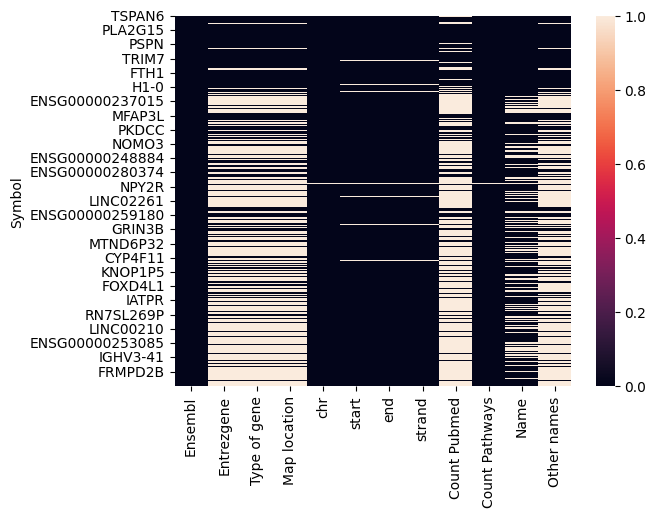

In [26]:
sns.heatmap(adata.var.isna())

In [11]:
adata.var.loc[adata.var.chr.isna()]

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
IBTK,ENSG00000005700,25998,protein-coding,6q14.1,NaN,NaN,NaN,NaN,10.0,0.0,inhibitor of Bruton tyrosine kinase,"['BTK-binding protein', 'Bruton agammaglobulin..."
MAP3K14,ENSG00000006062,9020,protein-coding,17q21.31,NaN,NaN,NaN,NaN,73.0,41.0,mitogen-activated protein kinase kinase kinase 14,"['NF-kappa-beta-inducing kinase', 'mitogen-act..."
AGK,ENSG00000006530,55750,protein-coding,7q34,NaN,NaN,NaN,NaN,29.0,10.0,acylglycerol kinase,"['acylglycerol kinase, mitochondrial', 'hAGK',..."
ADIPOR2,ENSG00000006831,79602,protein-coding,12p13.33,NaN,NaN,NaN,NaN,152.0,13.0,adiponectin receptor 2,"['adiponectin receptor protein 2', 'progestin ..."
E2F2,ENSG00000007968,1870,protein-coding,1p36.12,NaN,NaN,NaN,NaN,65.0,46.0,E2F transcription factor 2,transcription factor E2F2
...,...,...,...,...,...,...,...,...,...,...,...,...
DEFA8P,ENSG00000223629,449491,pseudo,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,"defensin alpha 8, pseudogene",NaN
USP17L7,ENSG00000226430,392197,protein-coding,8p23.1,NaN,NaN,NaN,NaN,NaN,0.0,ubiquitin specific peptidase 17 like family me...,['inactive ubiquitin carboxyl-terminal hydrola...
GOLGA8Q,ENSG00000178115,727909,protein-coding,15q13.2,NaN,NaN,NaN,NaN,NaN,2.0,golgin A8 family member Q,golgin subfamily A member 8Q


In [12]:
# Create a new DataFrame by dropping rows where 'chr' is NaN
adata.var_clean = adata.var.dropna(subset=['chr'])

In [35]:
adata.var_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45772 entries, TSPAN6 to ENSG00000284685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ensembl         45772 non-null  object  
 1   Entrezgene      19273 non-null  category
 2   Type of gene    19273 non-null  category
 3   Map location    19264 non-null  category
 4   chr             45772 non-null  category
 5   start           45772 non-null  float64 
 6   end             45772 non-null  float64 
 7   strand          45772 non-null  float64 
 8   Count Pubmed    15016 non-null  float64 
 9   Count Pathways  45772 non-null  float64 
 10  Name            33322 non-null  category
 11  Other names     17579 non-null  category
dtypes: category(6), float64(5), object(1)
memory usage: 5.6+ MB


#Creat a new column to cluster the cell type to cancer subtype

In [137]:
adata.var.columns

Index(['Ensembl', 'Entrezgene', 'Type of gene', 'Map location', 'chr', 'start',
       'end', 'strand', 'Count Pubmed', 'Count Pathways', 'Name',
       'Other names'],
      dtype='object')

In [38]:
# Create a mapping of cell lines to their subtypes
cell_line_to_subtype = {
    'AU565': 'H', 'HCC1937': 'TNA', 'HCC38': 'TNB', 'MDAMB468': 'TNB', 'EFM19': 'LB',
    'HCC1187': 'TNB', 'JIMT1': 'H', 'MDAMB361': 'H', 'HCC1500': 'LB', 'HCC70': 'TNA',
    'CAL51': 'TNB', 'MDAMB415': 'TNB', 'BT549': 'TNB', 'BT483': 'LA', 'MDAMB436': 'TNB',
    'DU4475': 'TNB', 'HS578T': 'TNA', 'MCF7': 'LA', 'CAMA1': 'LA', 'BT20': 'TNA',
    'T47D': 'LA', 'EVSAT': 'LB', 'HDQP1': 'LB', 'BT474': 'LB', 'CAL851': 'LB',
    'HCC1143': 'TNA', 'MCF12A': 'Basal-like', 'HCC1954': 'H', 'KPL1': 'LB',
    'ZR751': 'LA', 'MX1': 'TNA', 'MDAMB453': 'H'
}

# Map the subtypes to the 'cancer_subtype' column
adata.obs['Cancer_subtype'] = adata.obs['Cell Type'].map(cell_line_to_subtype)

# Verify the mapping
print(adata.obs[['Cell Type', 'cancer_subtype']].drop_duplicates())

      Cell Type cancer_subtype
0         AU565              H
596     HCC1937            TNA
1624      HCC38            TNB
2253   MDAMB468            TNB
3826      EFM19             LB
5142    HCC1187            TNB
6289      JIMT1              H
6857   MDAMB361              H
7610    HCC1500             LB
8225      HCC70            TNA
11043     CAL51            TNB
12303  MDAMB415            TNB
13180     BT549            TNB
15476     BT483             LA
15861  MDAMB436            TNB
16952    DU4475            TNB
17367    HS578T            TNA
18246      MCF7             LA
18677     CAMA1             LA
19500      BT20            TNA
20138      T47D             LA
22693     EVSAT             LB
23542     HDQP1             LB
23652     BT474             LB
25810    CAL851             LB
26805   HCC1143            TNA
28085    MCF12A     Basal-like
29829   HCC1954              H
31452      KPL1             LB
32394     ZR751             LA
33337       MX1            TNA
34157  M

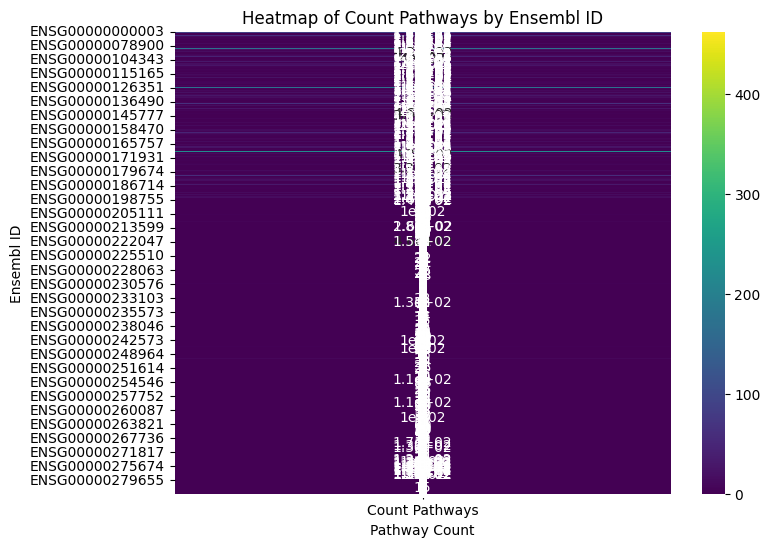

In [141]:
heatmap_data = adata.var_clean.pivot_table(values='Count Pathways',index='Ensembl')  #, aggfunc='sum'
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
plt.title('Heatmap of Count Pathways by Ensembl ID')
plt.xlabel('Pathway Count')
plt.ylabel('Ensembl ID')
plt.show()

<ipython-input-149-a8e73b689a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var_clean['Count Pathways'] = adata.var_clean['Count Pathways'].fillna(0)
<ipython-input-149-a8e73b689a75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var_clean['Count Pubmed'] = adata.var_clean['Count Pubmed'].fillna(0)


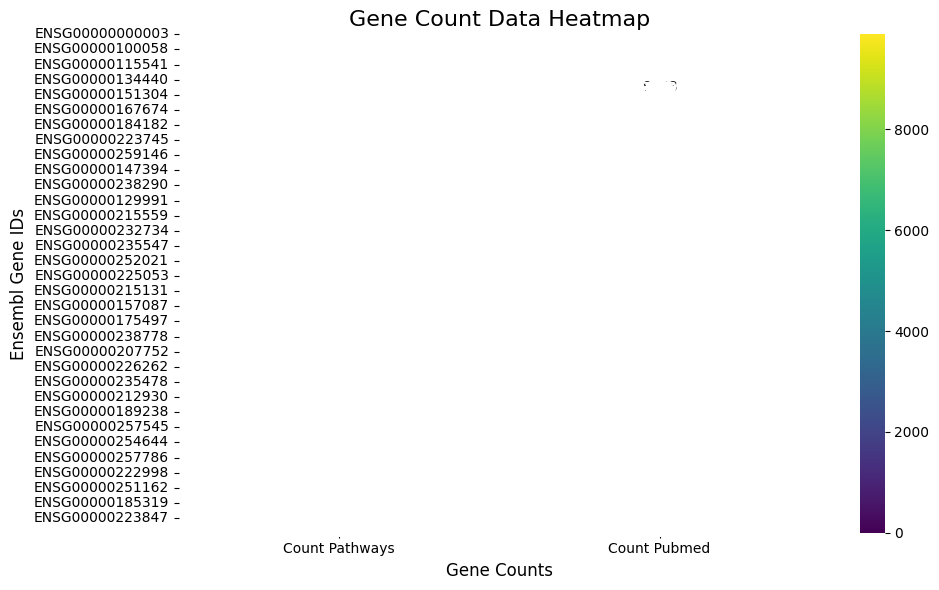

In [149]:
adata.var_clean['Count Pathways'] = adata.var_clean['Count Pathways'].fillna(0)
adata.var_clean['Count Pubmed'] = adata.var_clean['Count Pubmed'].fillna(0)
heatmap_data = adata.var_clean[['Count Pathways', 'Count Pubmed']]
heatmap_data.set_index(adata.var_clean['Ensembl'], inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="g", linewidths=0.5)

# Customize the plot further
plt.title('Gene Count Data Heatmap', fontsize=16)
plt.xlabel('Gene Counts', fontsize=12)
plt.ylabel('Ensembl Gene IDs', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-15-36825f95dfee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].mean().reset_index()


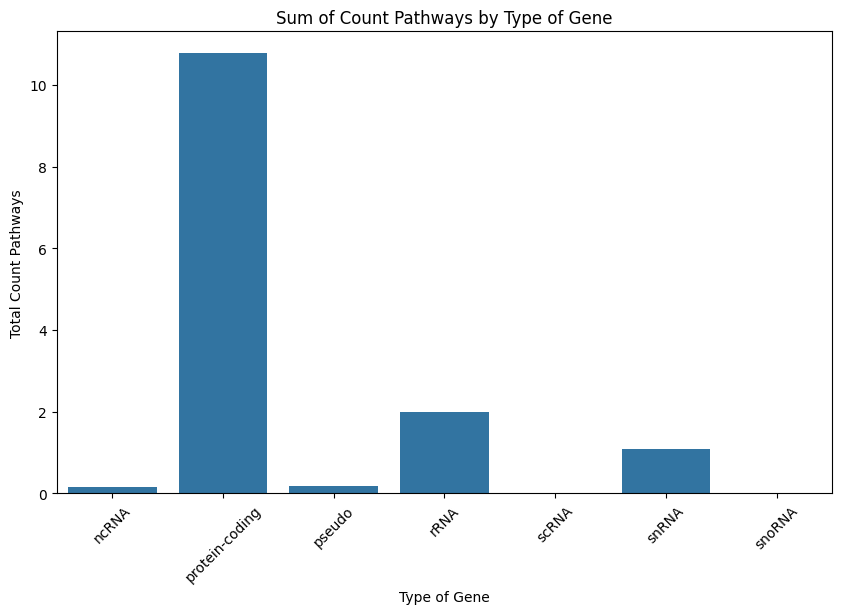

In [15]:
# Step 1: Aggregate data (sum Count Pathways for each Type of gene)
df_agg = adata.var_clean.groupby("Type of gene")["Count Pathways"].mean().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_agg, x="Type of gene", y="Count Pathways")

# Step 3: Customize plot
ax.set_title("Sum of Count Pathways by Type of Gene", fontsize=28)
ax.set_xlabel("Type of Gene", fontsize=20)
ax.set_ylabel("Total Count Pathways", fontsize=20)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


**Data analysis in cell type specific manner**

In [17]:
from sklearn.decomposition import PCA

In [18]:
sc.tl.pca(adata, svd_solver='arpack')

In [21]:
sc.pp.neighbors(adata, use_rep='X_pca', n_neighbors=15)

In [22]:
# Compute the neighbors graph (this step is required for UMAP and t-SNE)
# sc.pp.neighbors(adata, n_neighbors=10, use_rep='adata')  # You can change n_neighbors if needed

# Now, compute UMAP embeddings
sc.tl.umap(adata)

In [19]:
adata.var_names_make_unique()

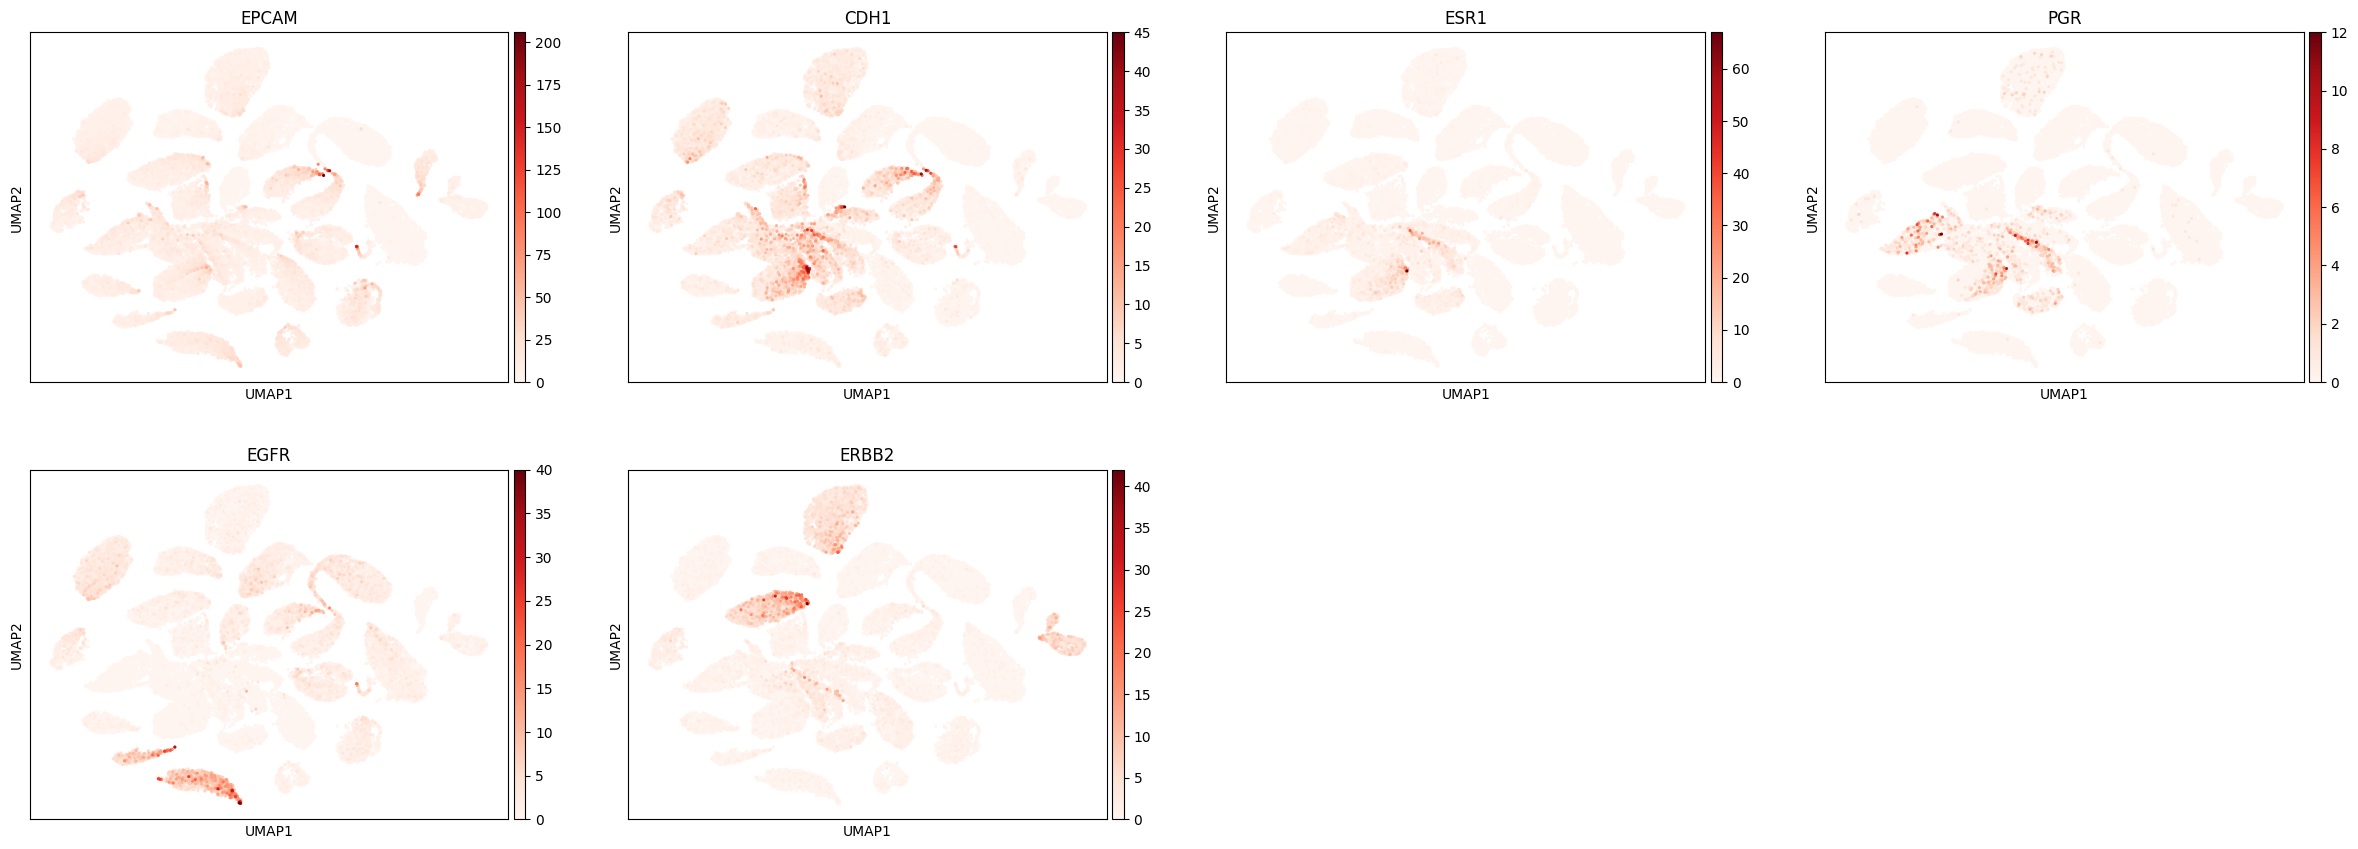

In [69]:
genes_of_interest = ["EPCAM","CDH1","ESR1","PGR", "EGFR","ERBB2"]  # Replace with your genes if needed

# Filter genes to include only those that exist in the dataset
genes_to_plot = [gene for gene in genes_of_interest if gene in adata.var_names]

# Make sure you have some genes to plot
if genes_to_plot:
    sc.pl.umap(
        adata,
        color=genes_to_plot,
        color_map="Reds",
        size=20
    )
else:
    print("None of the selected genes are found in the dataset.")

In [24]:
print(adata.obs.keys())

Index(['FullCode', 'Cell Type'], dtype='object')


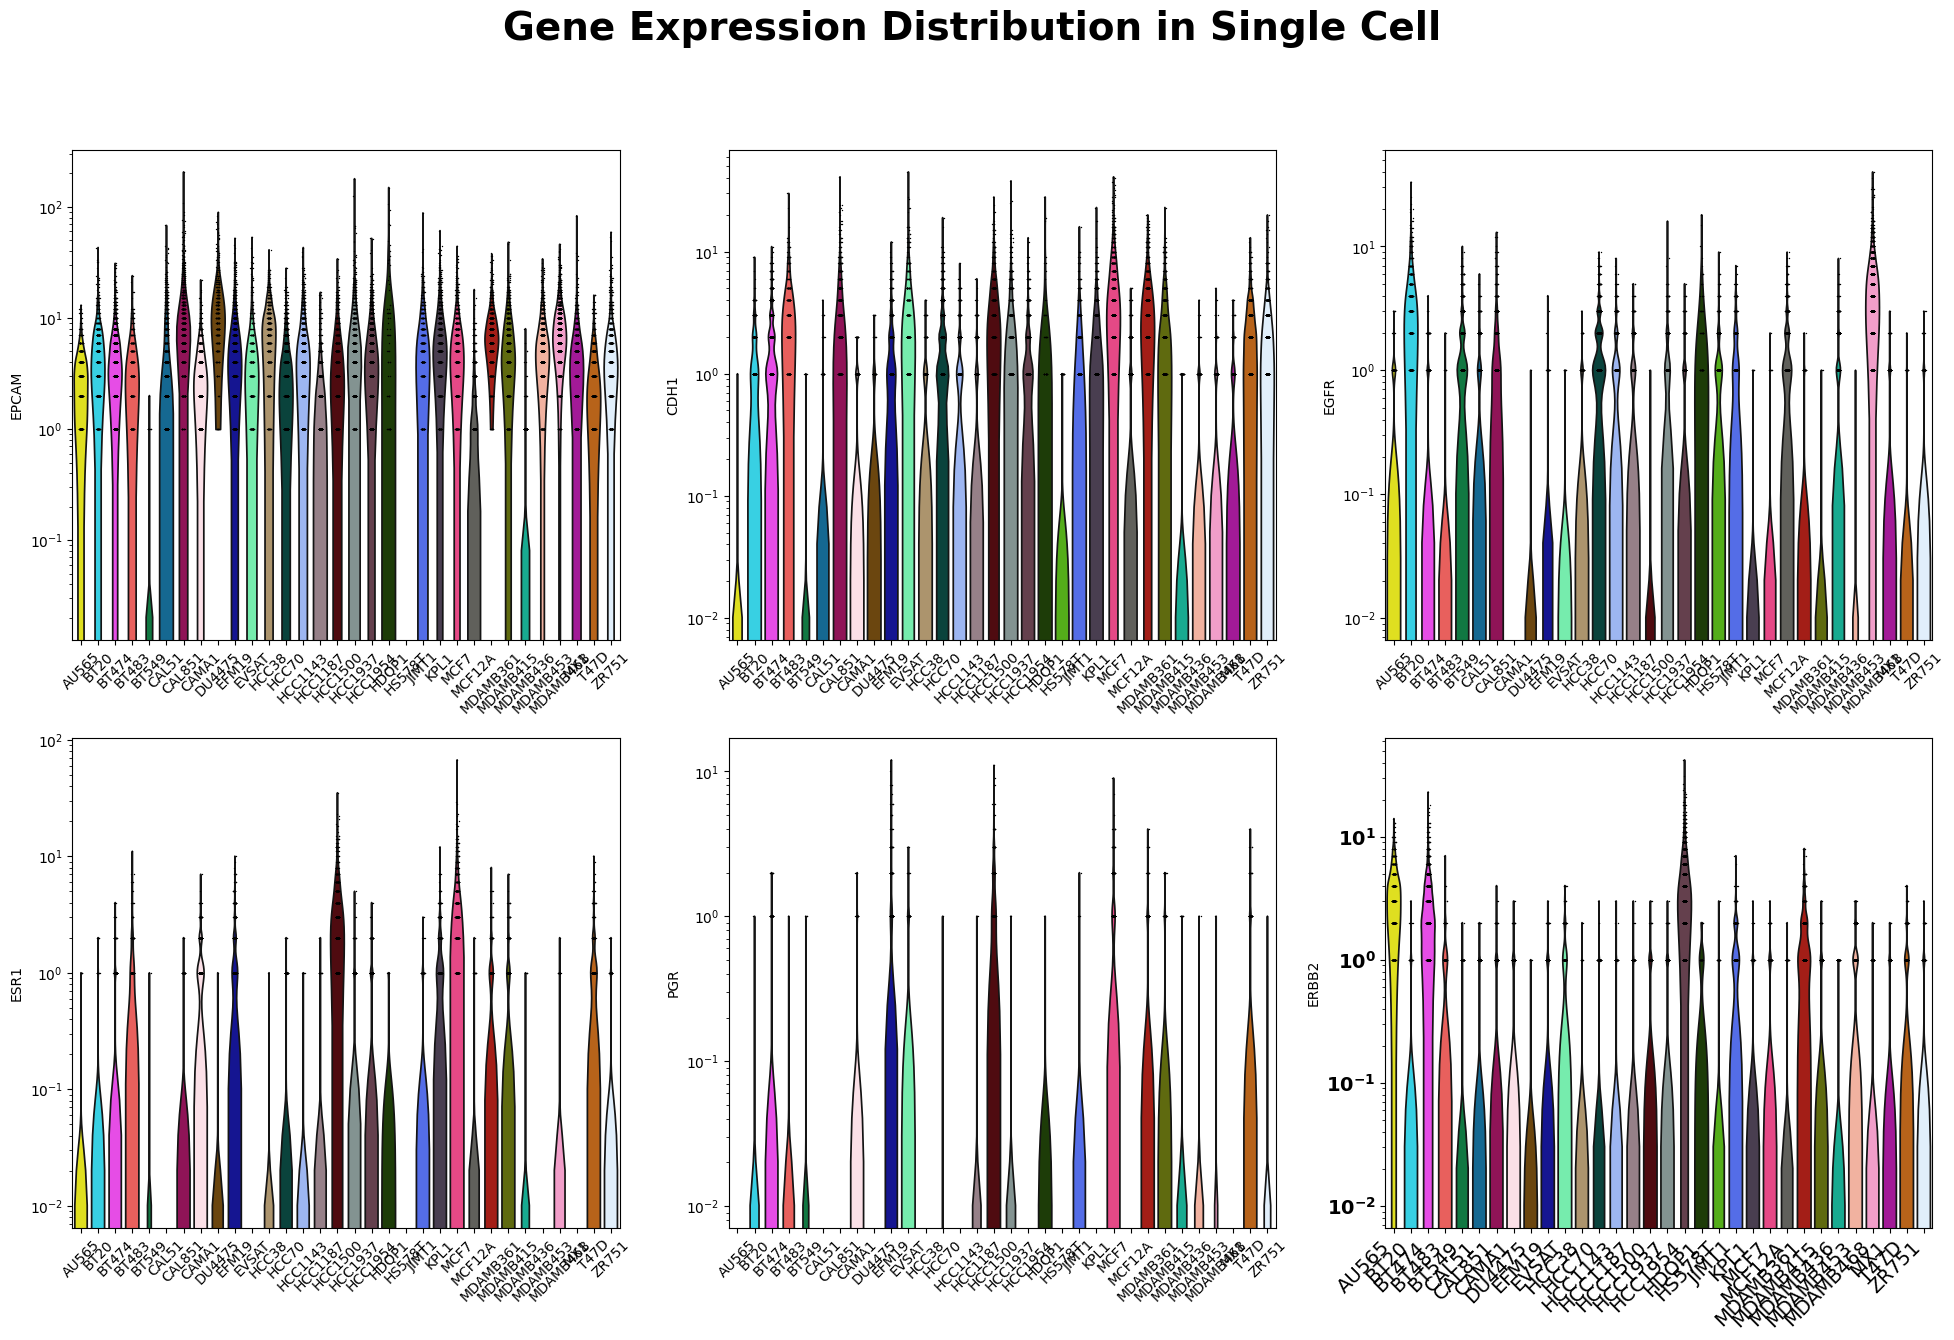

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 14))
# Flatten the axes array for easier indexing
axes = axes.flatten()
genes_of_interest = ["EPCAM","CDH1", "EGFR","ESR1","PGR","ERBB2"]
for i, gene in enumerate(genes_of_interest):
  sc.pl.violin(
        adata,  # Your AnnData object
        gene,  # Current gene
        groupby='Cell Type',  # Group by cell type (or another category)
        ax=axes[i],  # Specify the current axis
        show=False,  # Don't show the plot immediately
        log=True,  # Log scale for better visualization
        rotation=45  # Rotate x-axis labels for better readability
    )
# Customizing the title and font
plt.suptitle(
    'Gene Expression Distribution in Single Cell',
    fontsize=28,  # Set the title font size
    fontweight='bold',  # Make the title bold

)

# Customizing the x and y axis labels
#plt.xlabel(None)
# plt.ylabel('Expression Level', fontsize=14, fontweight='bold', family='Arial')

# Customizing tick labels (x and y axis)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_in_Single_Cell.png", transparent = True, bbox_inches="tight")

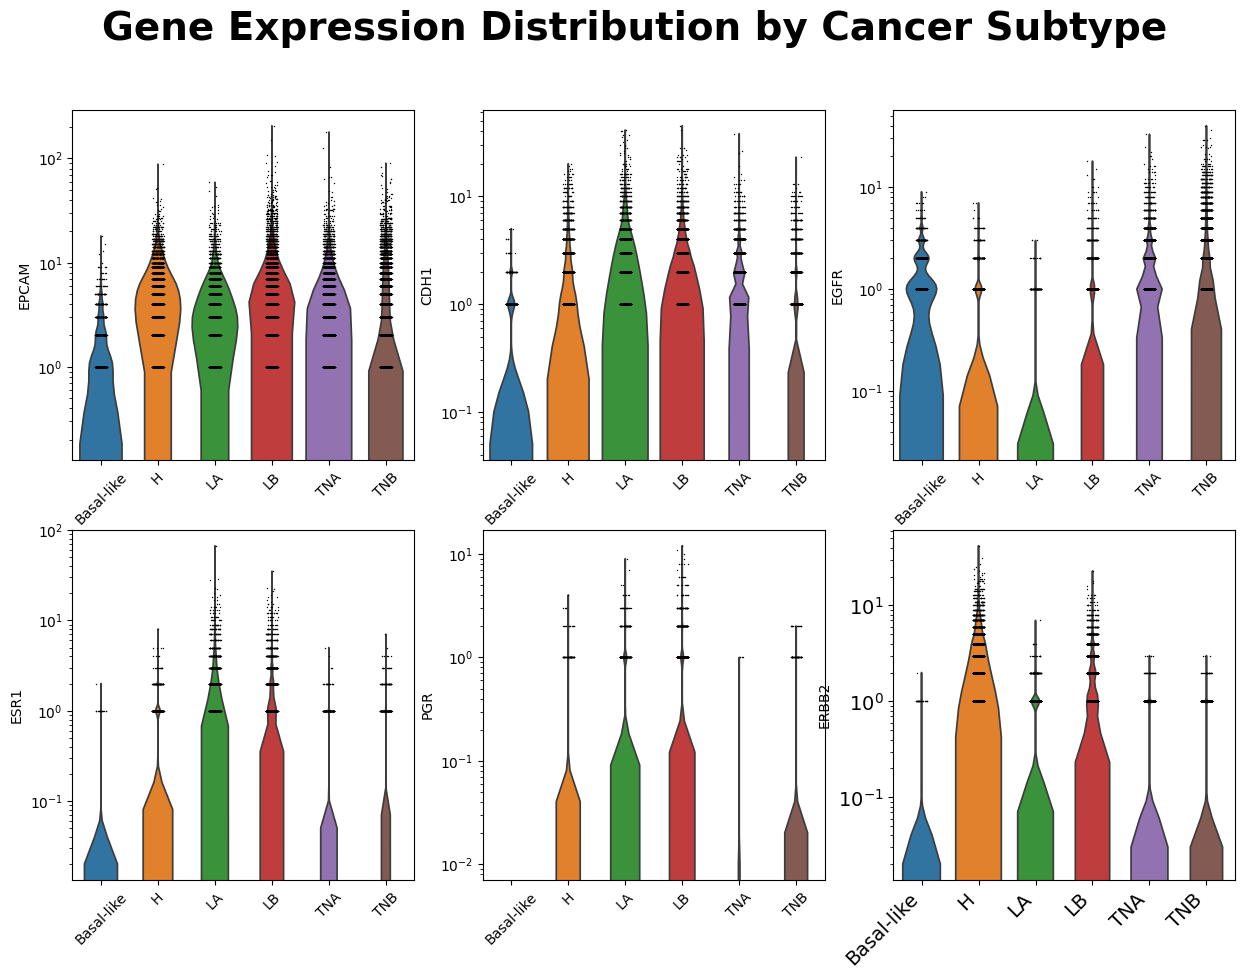

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# Flatten the axes array for easier indexing
axes = axes.flatten()
genes_of_interest = ["EPCAM","CDH1", "EGFR","ESR1","PGR","ERBB2"]  # Replace with your genes if needed

# Loop over genes and create a violin plot for each subplot
for i, gene in enumerate(genes_of_interest):
  sc.pl.violin(
        adata,  # Your AnnData object
        gene,  # Current gene
        groupby='Cancer_subtype',  # Group by cell type (or another category)
        ax=axes[i],  # Specify the current axis
        show=False,  # Don't show the plot immediately
        log=True,  # Log scale for better visualization
        rotation=45  # Rotate x-axis labels for better readability
    )
# Customizing the title and font
plt.suptitle(
    'Gene Expression Distribution by Cancer Subtype',
    fontsize=28,  # Set the title font size
    fontweight='bold',  # Make the title bold

)

# Customizing the x and y axis labels
#plt.xlabel(None)
# plt.ylabel('Expression Level', fontsize=14, fontweight='bold', family='Arial')

# Customizing tick labels (x and y axis)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype_violin.png", transparent = True, bbox_inches="tight")

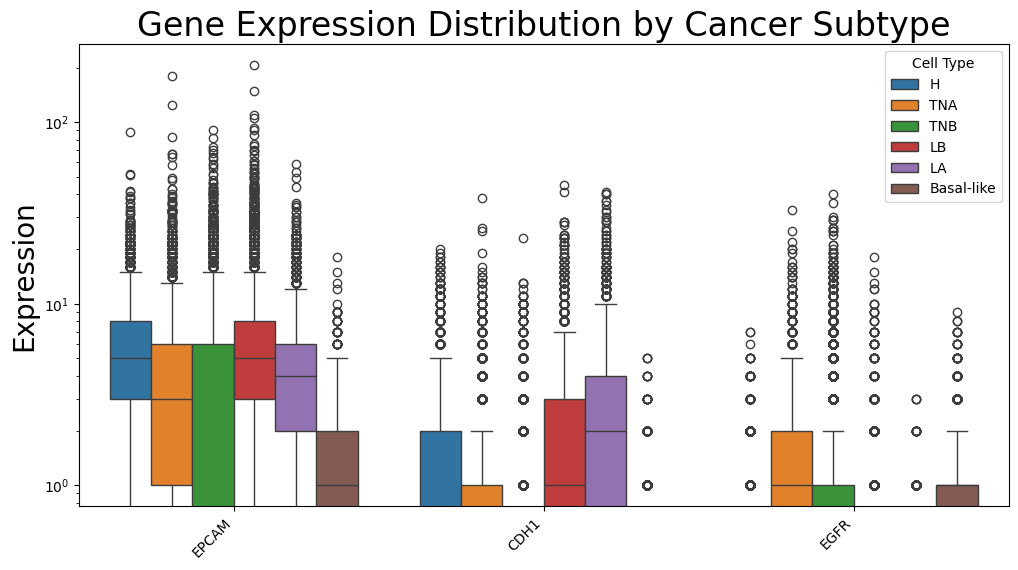

In [122]:
# Prepare data for seaborn boxplot
genes_of_interest_1 = ["EPCAM","CDH1", "EGFR"]  # Replace with your genes if needed
genes_of_interest_2 =["ESR1","PGR"]
data = []
for gene in genes_of_interest_1:
    if gene in adata.var_names:
        for subtype in adata.obs['cancer_subtype'].unique():
            expr_values = adata[adata.obs['cancer_subtype'] == subtype].to_df()[gene]
            data.extend([[gene, subtype, value] for value in expr_values])

# Create a DataFrame for plotting
df = pd.DataFrame(data, columns=['Gene', 'Subtype', 'Expression'])

# Create the boxplot
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gene', y='Expression', hue='Subtype')
plt.yscale('log')  # Use log scale if needed
plt.title('Gene Expression Distribution by Cancer Subtype', fontsize=24)
plt.xlabel(None)
plt.ylabel("Expression", fontsize=20)
# rotate the ticks
plt.xticks(rotation = 45, ha= "right")
plt.legend(title='Cell Type')
#plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype.png', transparent=True, bbox_inches='tight')


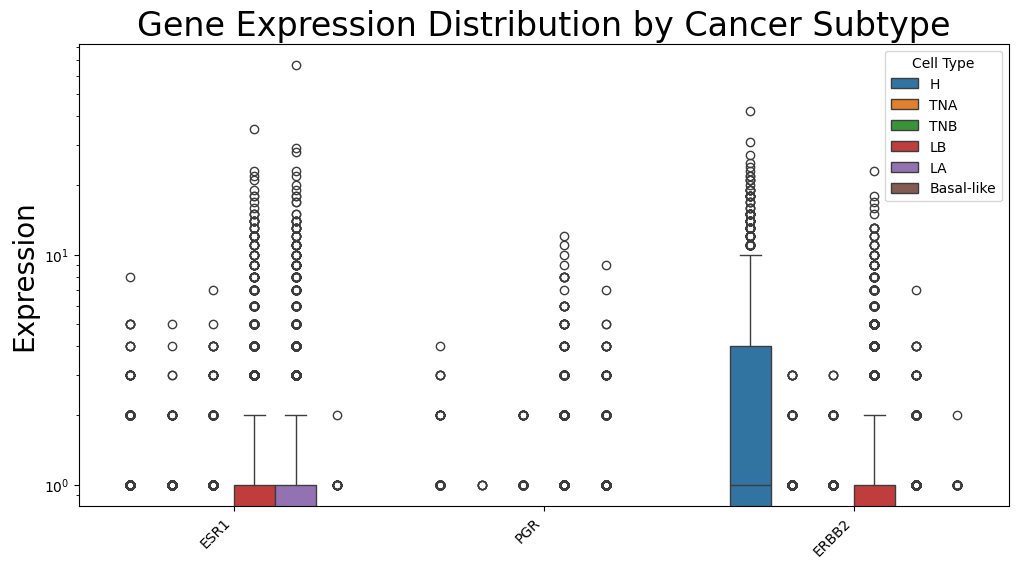

In [123]:
# Prepare data for seaborn boxplot
genes_of_interest_1 = ["EPCAM","CDH1", "EGFR"]  # Replace with your genes if needed
genes_of_interest_2 =["ESR1","PGR","ERBB2"]
data = []
for gene in genes_of_interest_2:
    if gene in adata.var_names:
        for subtype in adata.obs['cancer_subtype'].unique():
            expr_values = adata[adata.obs['cancer_subtype'] == subtype].to_df()[gene]
            data.extend([[gene, subtype, value] for value in expr_values])

# Create a DataFrame for plotting
df = pd.DataFrame(data, columns=['Gene', 'Subtype', 'Expression'])

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gene', y='Expression', hue='Subtype')
plt.title('Gene Expression Distribution by Cancer Subtype', fontsize=24)
plt.yscale('log')
plt.xlabel(None)
plt.ylabel("Expression", fontsize=20)
# rotate the ticks
plt.xticks(rotation = 45, ha= "right")
plt.legend(title='Cell Type')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Gene_Expression_Distribution_by_Cancer_Subtype_2.png', transparent=True, bbox_inches='tight')

In [78]:
adata.obs.head()

,FullCode,Cell Type,cancer_subtype,Cancer_subtype
0,AU565_AAACCAGTTTGG,AU565,H,H
1,AU565_AAACGTGCAGCG,AU565,H,H
2,AU565_AAAGCCACATGC,AU565,H,H
3,AU565_AAAGTCGGCTGG,AU565,H,H
4,AU565_AAAGTGCCTAAA,AU565,H,H


In [87]:
adata.var.head()

,Ensembl,Entrezgene,Type of gene,Map location,chr,start,end,strand,Count Pubmed,Count Pathways,Name,Other names
Symbol,,,,,,,,,,,,
TSPAN6,ENSG00000000003,7105,protein-coding,Xq22.1,X,100627108.0,100639991.0,-1.0,5.0,0.0,tetraspanin 6,"['A15 homolog', 'putative NF-kappa-B-activatin..."
DPM1,ENSG00000000419,8813,protein-coding,20q13.13,20,50934867.0,50959140.0,-1.0,NaN,18.0,dolichyl-phosphate mannosyltransferase subunit...,"['DPM synthase complex, catalytic subunit', 'D..."
SCYL3,ENSG00000000457,57147,protein-coding,1q24.2,1,169849631.0,169894267.0,-1.0,2.0,0.0,SCY1 like pseudokinase 3,"['SCY1-like 3', 'SCY1-like protein 3', 'SCY1-l..."
C1orf112,ENSG00000000460,55732,protein-coding,1q24.2,1,169662007.0,169854080.0,1.0,4.0,0.0,chromosome 1 open reading frame 112,uncharacterized protein C1orf112
FUCA2,ENSG00000001036,2519,protein-coding,6q24.2,6,143494812.0,143511720.0,-1.0,6.0,9.0,alpha-L-fucosidase 2,"['I+/--L-fucosidase 2', 'a-L-fucosidase 2', 'a..."


In [95]:
adata.var.index

RangeIndex(start=0, stop=47096, step=1)

In [116]:
adata.var.set_index('Symbol', inplace=True)

In [98]:
expr_data = adata.var.loc[adata.var["Symbol"].isin(genes_of_interest)]

In [100]:
# Extract expression data (adata.X) and convert it to a dense DataFrame
expr_data = adata.raw.X if hasattr(adata, 'raw') else adata.X  # Use raw counts if available
gene_names = adata.var_names  # Get gene names (from adata.var)
expr_data_df = pd.DataFrame(expr_data.toarray(), columns=gene_names, index=adata.obs.index)

# Add the 'Cell Type' column from adata.obs to this expression data
expr_data_df['Cell Type'] = adata.obs['Cell Type'].values

# Now you can group by 'Cell Type' and compute statistics, such as the mean expression of each gene
grouped_data = expr_data_df.groupby('Cell Type').mean()

# Display the result: mean expression of genes per cell type
print(grouped_data)

AttributeError: 'NoneType' object has no attribute 'X'

In [102]:
if adata.raw is None or adata.raw.X is None:
    print("Raw expression data (adata.raw.X) is missing!")
else:
    print("Raw expression data is present.")

Raw expression data (adata.raw.X) is missing!


In [54]:
import pandas as pd
expression_data = pd.read_csv('matrix.mtx', index_col=0)  # Load the expression matrix (cells x genes)
adata.X = expression_data.values  # Assign the data to adata.X
adata.var_names = expression_data.columns  # Assign gene names
adata.obs_names = expression_data.index  # Assign cell names


<ipython-input-54-a6318f134eec>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = adata.var.groupby(adata.obs['Cell Type'])['Count Pathways'].mean()  # Assuming 'Count Pathways' is in adata.var
